In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import random
from scipy.stats import ks_2samp
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
def roundR(x, r):
    return [np.round(i,r) for i in np.array(x)]

In [3]:
def update_weights(model_weights):
  for i in range(len(model_weights)):
    for j in range(len(model_weights[i])):
      if isinstance(model_weights[i][j], np.ndarray):
        for k in range(len(model_weights[i][j])):
          #print("chalra h", i, j, k)
            if (np.round(model_weights[i][j][k],2)==0):
                model_weights[i][j][k]=float(f'{model_weights[i][j][k]:.1g}')
            else:
                model_weights[i][j][k]=np.round(model_weights[i][j][k],2)
      else:
        if (np.round(model_weights[i][j],2)==0):
          model_weights[i][j]=float(f'{model_weights[i][j]:.1g}')
        else:
          model_weights[i][j]=np.round(model_weights[i][j],2)
  return model_weights

In [4]:
def node_comparison1(node1, node2, epsilon=0.05):
  for x, y in zip(node1,node2):
    #print(x,y)
    if isinstance(x, list):
        if((np.linalg.norm(np.array(x)-np.array(y))/len(x))<=epsilon):
            continue
        else:
            return False
    else:
        if(abs(x-y)<=epsilon):
            continue
        else:
            return False
  return True

In [5]:
def layer_comparison(layer1, layer2):
  for node1 in layer1:
    present=False
    for node2 in layer2:
      if (node_comparison1(node1, node2)):
        present=True
    if present==False:
      return False
  return True

In [6]:
def check_models(Model_weights1, Model_weights2):
  for i in range(0,len(Model_weights1), 2):
    layer1=[]
    layer2=[]
    for j in range(len(Model_weights1[i+1].T)):
      Node1=[]
      Node2=[]
      Node1.append(list(Model_weights1[i].T[j]))
      Node1.append(Model_weights1[i+1][j])
      if (i+2<len(Model_weights1)):
        Node1.append(list(Model_weights1[i+2][j]))
      Node2.append(list(Model_weights2[i].T[j]))
      Node2.append(Model_weights2[i+1][j])
      if (i+2<len(Model_weights2)):
        Node2.append(list(Model_weights2[i+2][j]))
      layer1.append(Node1)
      layer2.append(Node2)
    if (layer_comparison(layer1, layer2)):
      continue
    else:
      return False
  return True

In [7]:
def get_initial_model(inp, out):
    model = tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
def get_initial_model_2(inp, out):
    model = tf.keras.Sequential([
        Dense(1024, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
def get_initial_model_3(inp, out):
    model = tf.keras.Sequential([
        Dense(10, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
def get_initial_model_4(inp, out):
    model = tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
def get_DP_initial_model(inp, out):
    model=tf.keras.Sequential([
        Dense(5, input_dim=inp, kernel_initializer='normal', activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(out, activation='softmax')
        ])
    return model

In [12]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [27]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_2(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_2(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [60]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_3(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_3(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [61]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_4(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_4(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            for k in range(len(avg_sum[j])):
                avg_sum[j][k]=[avg_sum[j][k][l]+models_weights[i][j][k][l] for l in range(len(avg_sum[j][k]))]
            #print(isinstance(avg_sum[j], np.ndarray))
            #else: gayab kr diya
            print('andr aara h')
            for k in range(len(avg_sum[j+1])):
                avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [13]:
# custom functions for f1, precision and recall

from keras import backend as K
from tensorflow.keras.utils import to_categorical

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [17]:
#for SKIN_NonSkin dataset
df = pd.read_csv("ai4i2020.csv",sep=';')
#dataset.round(3)
#print(dataset['label'])
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')

print(df.columns)

#handle categorical data
df_str = pd.get_dummies(df_str)

target_variable="Machine failure"
target = df_int[target_variable]
x = df_int.drop(columns=target_variable)
column_names = x.columns.values

scaler = preprocessing.StandardScaler()
x_stndrd = scaler.fit_transform(x)
type(x_stndrd)

x_stndrd = pd.DataFrame(x_stndrd)
x_stndrd.columns = column_names

dataset = pd.concat([x_stndrd,df_str, target],axis=1)
print(dataset.columns)

Positive=dataset[dataset[target_variable]==0]
Negative=dataset[dataset[target_variable]==1]
print(len(Positive))
print(len(Negative))

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H',
       'Type_L', 'Type_M', 'Machine failure'],
      dtype='object')
9661
339


In [15]:
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break;
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

483 17
483 17


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
2022-11-25 17:13:57.779382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
13/13 [==============================] - 1s 11ms/step - loss: 0.7219 - f1_m: 0.2115 - val_loss: 0.6904 - val_f1_m: 0.7422
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6792 - f1_m: 0.8822 - val_loss: 0.6682 - val_f1_m: 0.9687
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6616 - f1_m: 0.9663 - val_loss: 0.6542 - val_f1_m: 0.9687
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6470 - f1_m: 0.9688 - val_loss: 0.6391 - val_f1_m: 0.9687
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6310 - f1_m: 0.9688 - val_loss: 0.6224 - val_f1_m: 0.9687
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6132 - f1_m: 0.9688 - val_loss: 0.6039 - val_f1_m: 0.9687
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5935 - f1_m: 0.9663 - val_loss: 0.5829 - val_f1_m: 0.9687
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.7207 - f1_m: 0.2067 - val_loss: 0.6920 - val_f1_m: 0.7109
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6797 - f1_m: 0.8894 - val_loss: 0.6686 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6621 - f1_m: 0.9663 - val_loss: 0.6536 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6473 - f1_m: 0.9663 - val_loss: 0.6382 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6316 - f1_m: 0.9639 - val_loss: 0.6209 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6139 - f1_m: 0.9663 - val_loss: 0.6022 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5944 - f1_m: 0.9663 - val_loss: 0.5809 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5725 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.7200 - f1_m: 0.1971 - val_loss: 0.6921 - val_f1_m: 0.5859
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6785 - f1_m: 0.9014 - val_loss: 0.6705 - val_f1_m: 0.9375
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6607 - f1_m: 0.9784 - val_loss: 0.6576 - val_f1_m: 0.9375
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6456 - f1_m: 0.9760 - val_loss: 0.6437 - val_f1_m: 0.9375
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6289 - f1_m: 0.9784 - val_loss: 0.6285 - val_f1_m: 0.9375
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6105 - f1_m: 0.9784 - val_loss: 0.6115 - val_f1_m: 0.9375
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5899 - f1_m: 0.9760 - val_loss: 0.5923 - val_f1_m: 0.9375
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5660 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.7208 - f1_m: 0.1971 - val_loss: 0.6917 - val_f1_m: 0.6953
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6795 - f1_m: 0.8918 - val_loss: 0.6687 - val_f1_m: 0.9688
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6616 - f1_m: 0.9663 - val_loss: 0.6545 - val_f1_m: 0.9688
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6471 - f1_m: 0.9688 - val_loss: 0.6394 - val_f1_m: 0.9688
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6310 - f1_m: 0.9688 - val_loss: 0.6228 - val_f1_m: 0.9688
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6134 - f1_m: 0.9688 - val_loss: 0.6044 - val_f1_m: 0.9688
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5933 - f1_m: 0.9688 - val_loss: 0.5833 - val_f1_m: 0.9688
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5703 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.7196 - f1_m: 0.2163 - val_loss: 0.6897 - val_f1_m: 0.7031
Epoch 2/20
 1/13 [=>............................] - ETA: 0s - loss: 0.6913 - f1_m: 0.6250

KeyboardInterrupt: 

In [13]:
for i in range(len(Models)):
  print(Models[i][1])
print(len(Models))
#test_Acc = [i.numpy() for i in test_acc]
print(test_acc)

17
2
2
[[0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996, 0.96599996], [0.96599996, 0.96599996]]


In [15]:
#not needed in this case
#this works for getting sorted recurrent models by frequency no
A=np.argsort(np.array(Models).T[1])[::-1][:2]
print(A)
temp=list(np.array(Models)[A])
#print(temp[2][1])

[0 1]


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [16]:
#reducing the metrics lists to top 5 models only
val_acc=list(np.array(val_acc)[A])
test_acc=list(np.array(test_acc)[A])
train_acc=list(np.array(train_acc)[A])
val_loss=list(np.array(val_loss)[A])
train_loss=list(np.array(train_loss)[A])

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with

In [17]:
mean_model_weights=[]
for i in range(5):
    mean_model_weights.append(get_avg_weights(add_weights[i],X_test.shape[1], 2))

[array([[ 0.03 , -0.08 ,  0.03 ,  0.004,  0.03 ],
       [-0.02 ,  0.07 ,  0.01 , -0.01 ,  0.02 ],
       [ 0.01 , -0.02 , -0.03 , -0.01 , -0.07 ],
       [-0.14 ,  0.004,  0.04 ,  0.001, -0.04 ],
       [-0.06 , -0.02 , -0.07 , -0.003, -0.08 ],
       [ 0.26 , -0.02 ,  0.08 , -0.05 ,  0.12 ],
       [ 0.27 , -0.06 ,  0.18 ,  0.04 ,  0.27 ],
       [ 0.28 , -0.13 ,  0.12 , -0.06 ,  0.21 ]], dtype=float32), array([ 0.26, -0.07,  0.14, -0.08,  0.2 ], dtype=float32), array([[-0.6 ,  0.58,  0.3 , -0.4 ,  0.77,  0.56,  0.91, -0.26, -0.45,
        -0.15],
       [ 0.11,  0.08, -0.09,  0.09, -0.02, -0.11, -0.36, -0.19, -0.04,
        -0.22],
       [-0.35,  0.17,  0.31, -0.45,  0.1 , -0.1 , -0.06, -0.58, -0.49,
         0.36],
       [-0.44, -0.05, -0.32, -0.39,  0.43,  0.26, -0.13,  0.46,  0.02,
        -0.17],
       [-0.62,  0.49,  0.25, -0.46, -0.19,  0.27,  0.4 , -0.2 ,  0.47,
        -0.22]], dtype=float32), array([-0.01,  0.18,  0.21, -0.01,  0.15,  0.18,  0.24, -0.02, -0.02,
       -0

IndexError: list index out of range

In [19]:
#mean models
from sklearn.model_selection import train_test_split
mean_models=[]
mean_model_train_metrics=[]
mean_model_loss=[]
mean_model_acc=[]
mean_model_test_metrics=[]
mean_model_test_loss=[]
mean_model_test_acc=[]
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
for i in range(2):
    init_model=get_initial_model(X_test.shape[1], 2)
    init_model.set_weights(mean_model_weights[i])
    mean_model_train_metrics.append(init_model.evaluate(X_train, y_train))
    mean_model_loss.append(mean_model_train_metrics[i][0])
    mean_model_acc.append(mean_model_train_metrics[i][1])
    mean_model_test_metrics.append(init_model.evaluate(X_test, y_test))
    mean_model_test_loss.append(mean_model_test_metrics[i][0])
    mean_model_test_acc.append(mean_model_test_metrics[i][1])
print("Done for model selection")

94/94 [==============================] - 0s 554us/step - loss: 0.1382 - accuracy: 0.9633
Done for model selection


In [20]:
print(mean_model_loss, mean_model_acc)
print(mean_model_test_loss, mean_model_test_acc)

[0.12707483768463135, 0.1259629726409912] [0.967285692691803, 0.967285692691803]
[0.13974390923976898, 0.13817985355854034] [0.9633333086967468, 0.9633333086967468]


In [21]:
#benchmark model
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
benchmark_model=get_initial_model(X_test.shape[1], 2) #same intial weights
benchmark_model.set_weights(initial_model.get_weights())
history = benchmark_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
benchmark_model.set_weights(update_weights(benchmark_model.get_weights()))

Epoch 1/20
175/175 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.9532 - val_loss: 0.1457 - val_accuracy: 0.9771
Epoch 2/20
175/175 [==============================] - 0s 813us/step - loss: 0.1310 - accuracy: 0.9668 - val_loss: 0.0997 - val_accuracy: 0.9771
Epoch 3/20
175/175 [==============================] - 0s 831us/step - loss: 0.1195 - accuracy: 0.9668 - val_loss: 0.0964 - val_accuracy: 0.9771
Epoch 4/20
175/175 [==============================] - 0s 827us/step - loss: 0.1159 - accuracy: 0.9668 - val_loss: 0.0914 - val_accuracy: 0.9771
Epoch 5/20
175/175 [==============================] - 0s 816us/step - loss: 0.1129 - accuracy: 0.9668 - val_loss: 0.0891 - val_accuracy: 0.9771
Epoch 6/20
175/175 [==============================] - 0s 857us/step - loss: 0.1098 - accuracy: 0.9668 - val_loss: 0.0861 - val_accuracy: 0.9771
Epoch 7/20
175/175 [==============================] - 0s 844us/step - loss: 0.1067 - accuracy: 0.9668 - val_loss: 0.0846 - val_accuracy: 0

In [12]:
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
benchmark_model=get_initial_model(X_test.shape[1], 2) #same intial weights
benchmark_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 2)                 12        
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


2022-09-20 17:43:05.044897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
#benchmark metrics
benchmark_loss=history.history['loss']
benchmark_val_loss=history.history['val_loss']
benchmark_acc=history.history['accuracy']
benchmark_val_acc=history.history['val_accuracy']
benchmark_test_metrics=benchmark_model.evaluate(X_test, y_test)
benchmark_test_loss=benchmark_test_metrics[0]
benchmark_test_accuracy=benchmark_test_metrics[1]

94/94 [==============================] - 0s 588us/step - loss: 0.1030 - accuracy: 0.9647


In [54]:
#from here onwards the comparison and computation of DP:
import tensorflow as tf
import numpy as np
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
l2_norm_clip = 1.5
noise_multiplier = 6.9
num_microbatches = 1

In [55]:
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
DP_model=get_DP_initial_model(X_test.shape[1], 2) #same intial weights
optimizer = tensorflow_privacy.DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches)
loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)
DP_model.compile(optimizer=optimizer, loss=loss, metrics=[f1_m])
history = DP_model.fit(X_train, y_train,  epochs=20, validation_split=0.2, verbose=1)
#benchmark_model.set_weights(update_weights(benchmark_model.get_weights()))

Epoch 1/20


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


175/175 [==============================] - 1s 2ms/step - loss: 0.6996 - f1_m: 0.4733 - val_loss: 0.6931 - val_f1_m: 0.6858
Epoch 2/20
133/175 [=====================>........] - ETA: 0s - loss: 0.6877 - f1_m: 0.7789

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


175/175 [==============================] - 0s 1ms/step - loss: 0.6852 - f1_m: 0.8073 - val_loss: 0.6759 - val_f1_m: 0.8783
Epoch 3/20
175/175 [==============================] - 0s 991us/step - loss: 0.6713 - f1_m: 0.8952 - val_loss: 0.6628 - val_f1_m: 0.9164
Epoch 4/20
175/175 [==============================] - 0s 910us/step - loss: 0.6598 - f1_m: 0.9362 - val_loss: 0.6577 - val_f1_m: 0.9437
Epoch 5/20
175/175 [==============================] - 0s 934us/step - loss: 0.6548 - f1_m: 0.9613 - val_loss: 0.6552 - val_f1_m: 0.9607
Epoch 6/20
175/175 [==============================] - 0s 975us/step - loss: 0.6498 - f1_m: 0.9682 - val_loss: 0.6473 - val_f1_m: 0.9614
Epoch 7/20
175/175 [==============================] - 0s 922us/step - loss: 0.6410 - f1_m: 0.9689 - val_loss: 0.6419 - val_f1_m: 0.9614
Epoch 8/20
175/175 [==============================] - 0s 935us/step - loss: 0.6377 - f1_m: 0.9689 - val_loss: 0.6294 - val_f1_m: 0.9614
Epoch 9/20
175/175 [==============================] - 0s 964u

In [53]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=X_train.shape[0]*0.8,
                                              batch_size=13,
                                              noise_multiplier=6.9,
                                              epochs=20,
                                              delta=1e-5)[0]

DP-SGD with sampling rate = 0.232% and noise_multiplier = 6.9 iterated over 8616 steps satisfies differential privacy with eps = 0.108 and delta = 1e-05.
The optimal RDP order is 128.0.


0.10807801462543376

In [48]:
#for epsilon ≈ 1
DP_1_loss=history.history['loss']
DP_1_f1=history.history['f1_m']
DP_1_f1_train=DP_model.evaluate(X_train,y_train)
DP_1_f1_test=DP_model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 607us/step - loss: 0.2296 - f1_m: 0.9703


In [37]:
#for epsilon ≈ 0.5
DP_0_5_loss=history.history['loss']
DP_0_5_f1=history.history['f1_m']
DP_0_5_f1_train=DP_model.evaluate(X_train,y_train)
DP_0_5_f1_test=DP_model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 585us/step - loss: 0.2030 - f1_m: 0.9731


In [60]:
#for epsilon ≈ 0.1
DP_0_1_loss=history.history['loss']
DP_0_1_f1=history.history['f1_m']
DP_0_1_f1_train=DP_model.evaluate(X_train,y_train)
DP_0_1_f1_test=DP_model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 584us/step - loss: 0.5206 - f1_m: 0.9630


2
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


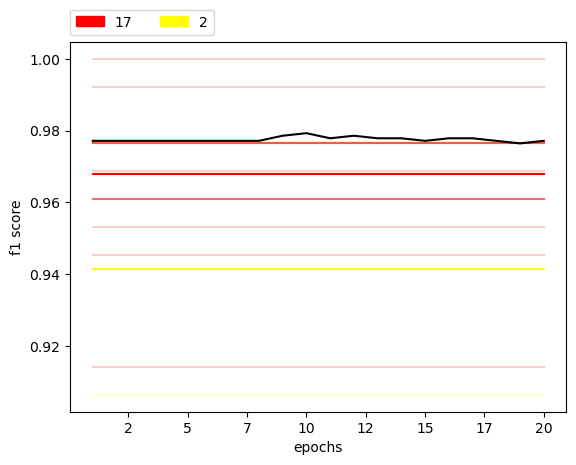

In [57]:
#plotting graphs for loss and accuracies for the top 5 recurrent models:
#plotting val_loss and loss for the models generated and the benchmark model.
from random import randint
import matplotlib.patches as mpatches
color = ['red', 'yellow']
leg=[]
for i in range(len(color)):
    leg.append(mpatches.Patch(color=color[i], label=str(len(val_acc[i]))))
n = len(val_acc)
print(n)
x_axis=np.arange(1, 21, 1)
print(x_axis)
for i in range(n):
    for j in range(len(val_acc[i])):
        plt.plot(x_axis,val_acc[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis, np.mean(val_acc[i], axis=0), color=color[i])
#plt.xlim(-0.5,20.5)
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.plot(x_axis, benchmark_val_acc, color='black')
plt.savefig("fig/ai4i2020_F1_Val_20Epochs_10000.jpeg")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
1 0
1 1


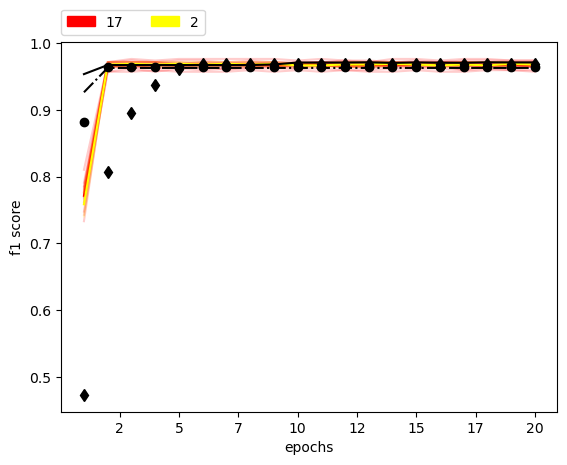

In [61]:
#train accuracy 
from random import randint
color = []
#print(train_acc[4][0])
color = ['red', 'yellow','blue', 'green']
x_axis=np.arange(1, 21, 1)
print(x_axis)
for i in range(n):
    for j in range(len(train_acc[i])):
        print(i,j)
        plt.plot(x_axis,train_acc[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(train_acc[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_acc, color='black')
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.plot(x_axis, DP_1_f1, 'o', color='black')
plt.plot(x_axis, DP_0_5_f1, '-.', color='black')
plt.plot(x_axis, DP_0_1_f1, 'd', color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/AI4I2020_F1_train_20Epochs_10000.jpeg")

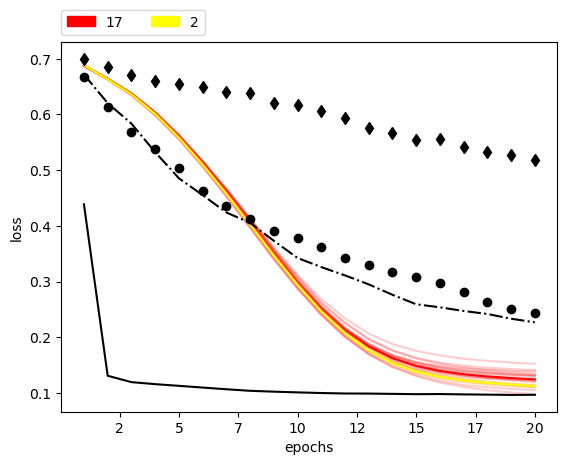

In [63]:
#training loss
from random import randint
color = []
n = len(train_loss)
color = ['red', 'yellow','blue', 'green','cyan']
for i in range(n):
    for j in range(len(train_loss[i])):
        plt.plot(x_axis,train_loss[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(train_loss[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_loss, color='black')
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(x_axis, DP_1_loss, 'o', color='black')
plt.plot(x_axis, DP_0_5_loss, '-.', color='black')
plt.plot(x_axis, DP_0_1_loss, 'd', color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/AI4i2020_loss_train_20Epochs_10000.jpeg")

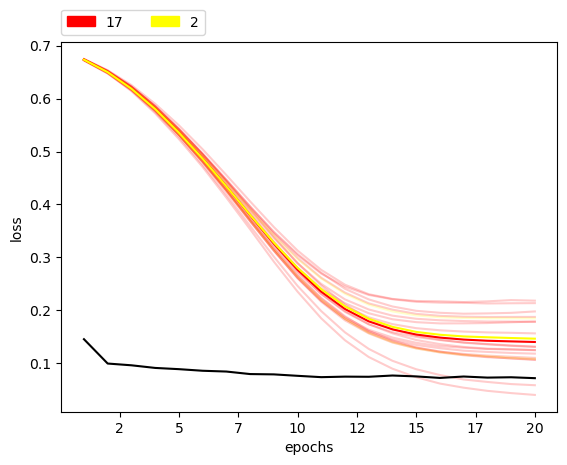

In [64]:
#validation loss loss
from random import randint
color = []
n = len(val_acc)
color = ['red', 'yellow','blue', 'green','cyan']
for i in range(n):
    for j in range(len(train_loss[i])):
        plt.plot(x_axis,val_loss[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis,np.mean(val_loss[i], axis=0), color=color[i])
plt.plot(x_axis,benchmark_val_loss, color='black')
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/ai4i2020_loss_val_20Epochs_10000.jpeg")

In [65]:
#lets compute the accuracy for bigger test set 30% benchmark test data
high_test_loss=[]
high_test_f1=[]
for i in range(len(add_weights)):
    for j in range(len(add_weights[i])):
        high_test_model=get_initial_model(X_test.shape[1], 2) #same intial weights
        high_test_model.set_weights(Models[i][0])
        high_test_metrics=high_test_model.evaluate(X_test,y_test)
        if j == 0:
            high_test_loss.append([high_test_metrics[0]])
            high_test_f1.append([high_test_metrics[1]])
        else:
            high_test_loss[i].append(high_test_metrics[0])
            high_test_f1[i].append(high_test_metrics[1])
print(high_test_loss, high_test_f1)

94/94 [==============================] - 0s 618us/step - loss: 0.1352 - accuracy: 0.9630
[[0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426, 0.1456855833530426], [0.13523511588573456, 0.13523511588573456]] [[0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628], [0.9629999995231628, 0.9629999995231628]]


In [66]:
high_test_accs=list(np.array(high_test_f1)[A])
print(high_test_accs)

[[0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628, 0.9629999995231628], [0.9629999995231628, 0.9629999995231628]]


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


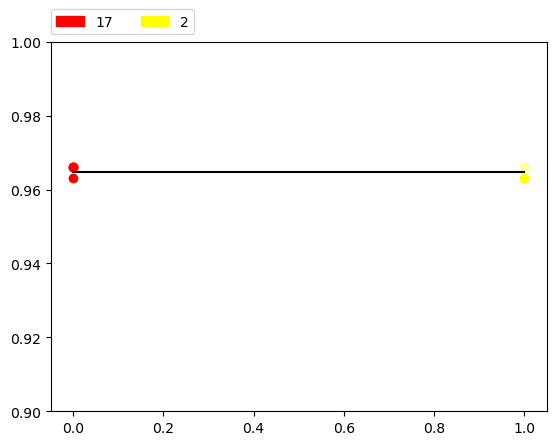

In [67]:
#for test accuracy plot
#plot test accuracy of smaller test set
benchmark_test_accs=[benchmark_test_accuracy]*n
ax = plt.gca()
ax.set_ylim([0.9, 1.0])
for i in range(n):
    plt.scatter([i]*len(test_acc[i]),test_acc[i], color=color[i], alpha=0.2)
    plt.scatter(i,high_test_accs[i][0], color=color[i])
plt.plot(benchmark_test_accs, color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/AI4i2020_test_acc_20Epochs_1000.jpeg")
plt.show()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


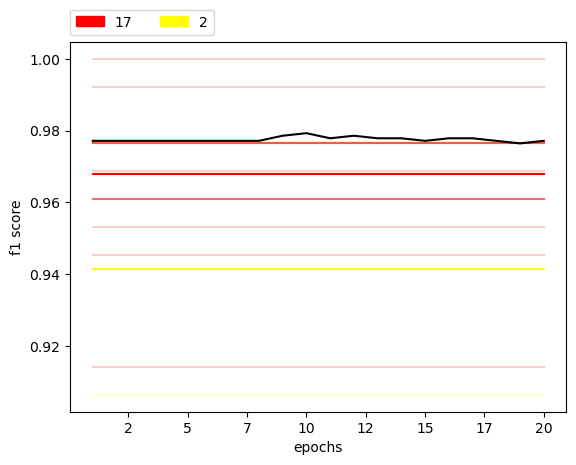

In [69]:
#plotting graphs for loss and accuracies for the top 5 recurrent models:
#plotting val_loss and loss for the models generated and the benchmark model.
from random import randint
import matplotlib.patches as mpatches
color = ['red', 'yellow']
leg=[]
for i in range(len(color)):
    leg.append(mpatches.Patch(color=color[i], label=str(len(val_acc[i]))))
n = len(val_acc)
x_axis=np.arange(1, 21, 1)
print(x_axis)
for i in range(n):
    for j in range(len(val_acc[i])):
        plt.plot(x_axis,val_acc[i][j], color=color[i], alpha=0.2)
    plt.plot(x_axis, np.mean(val_acc[i], axis=0), color=color[i])
#plt.xlim(-0.5,20.5)
plt.xticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0],[2,5,7,10,12,15,17,20])
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.plot(x_axis, benchmark_val_acc, color='black')
plt.savefig("fig/ai4i2020_F1_Val_20Epochs_10000.jpeg")

In [70]:
print(val_acc)

[[[0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552, 0.9609374403953552], [0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375], [0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625], [0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.976562

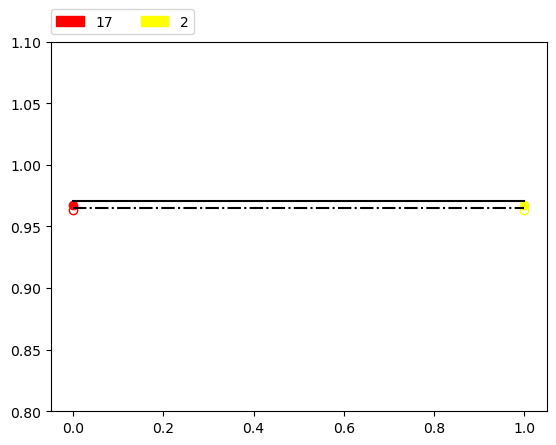

In [74]:
#plot for mean model accuracy and benchmark loss:
n=2
ax = plt.gca()
ax.set_ylim([0.8, 1.1])
for i in range(n):
    plt.plot(i, mean_model_acc[i],'o',color=color[i])
    plt.plot(i, mean_model_test_acc[i],'o', mfc='none',color=color[i])
plt.plot([benchmark_acc[-1]]*n,color='black')
plt.plot([benchmark_test_accuracy]*n,'-.',color='black')
plt.legend(handles=leg, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=5)
plt.savefig("fig/ai4i_mean_model_results.jpeg")
plt.show()

In [18]:
#now trying for aNN-2 get-initial_model2
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_2(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model_2(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break;
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

483 17
483 17


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/20
13/13 [==============================] - 0s 9ms/step - loss: 0.3919 - f1_m: 0.9327 - val_loss: 0.1631 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1809 - f1_m: 0.9639 - val_loss: 0.1042 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - f1_m: 0.9615 - val_loss: 0.0906 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1412 - f1_m: 0.9615 - val_loss: 0.0861 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1269 - f1_m: 0.9615 - val_loss: 0.0864 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1169 - f1_m: 0.9639 - val_loss: 0.0859 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1077 - f1_m: 0.9663 - val_loss: 0.0798 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.09

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3719 - f1_m: 0.9375 - val_loss: 0.2673 - val_f1_m: 0.9609
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1482 - f1_m: 0.9712 - val_loss: 0.2634 - val_f1_m: 0.9609
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1216 - f1_m: 0.9712 - val_loss: 0.2696 - val_f1_m: 0.9609
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1041 - f1_m: 0.9712 - val_loss: 0.2715 - val_f1_m: 0.9609
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0945 - f1_m: 0.9712 - val_loss: 0.2727 - val_f1_m: 0.9609
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0878 - f1_m: 0.9663 - val_loss: 0.2653 - val_f1_m: 0.9609
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0816 - f1_m: 0.9760 - val_loss: 0.2633 - val_f1_m: 0.9609
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0785 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.4116 - f1_m: 0.9207 - val_loss: 0.1651 - val_f1_m: 0.9922
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2141 - f1_m: 0.9615 - val_loss: 0.1003 - val_f1_m: 0.9922
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1849 - f1_m: 0.9591 - val_loss: 0.0904 - val_f1_m: 0.9922
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1627 - f1_m: 0.9615 - val_loss: 0.0956 - val_f1_m: 0.9922
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1431 - f1_m: 0.9615 - val_loss: 0.0925 - val_f1_m: 0.9922
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1277 - f1_m: 0.9567 - val_loss: 0.0810 - val_f1_m: 0.9922
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1160 - f1_m: 0.9639 - val_loss: 0.0733 - val_f1_m: 0.9922
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1067 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.3772 - f1_m: 0.9327 - val_loss: 0.1990 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1732 - f1_m: 0.9663 - val_loss: 0.1635 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1465 - f1_m: 0.9663 - val_loss: 0.1515 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1336 - f1_m: 0.9663 - val_loss: 0.1337 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1204 - f1_m: 0.9663 - val_loss: 0.1233 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1133 - f1_m: 0.9663 - val_loss: 0.1193 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1079 - f1_m: 0.9639 - val_loss: 0.1135 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1047 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.4045 - f1_m: 0.9327 - val_loss: 0.3166 - val_f1_m: 0.9531
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1947 - f1_m: 0.9736 - val_loss: 0.3202 - val_f1_m: 0.9531
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1633 - f1_m: 0.9736 - val_loss: 0.3002 - val_f1_m: 0.9531
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1440 - f1_m: 0.9736 - val_loss: 0.2751 - val_f1_m: 0.9531
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1261 - f1_m: 0.9736 - val_loss: 0.2379 - val_f1_m: 0.9531
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1089 - f1_m: 0.9688 - val_loss: 0.2153 - val_f1_m: 0.9609
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0951 - f1_m: 0.9784 - val_loss: 0.1941 - val_f1_m: 0.9609
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0862 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3913 - f1_m: 0.9207 - val_loss: 0.1187 - val_f1_m: 1.0000
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2087 - f1_m: 0.9591 - val_loss: 0.0429 - val_f1_m: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1894 - f1_m: 0.9591 - val_loss: 0.0380 - val_f1_m: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1727 - f1_m: 0.9591 - val_loss: 0.0485 - val_f1_m: 1.0000
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1584 - f1_m: 0.9567 - val_loss: 0.0532 - val_f1_m: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1480 - f1_m: 0.9567 - val_loss: 0.0489 - val_f1_m: 1.0000
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1390 - f1_m: 0.9591 - val_loss: 0.0491 - val_f1_m: 1.0000
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1299 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.4049 - f1_m: 0.9255 - val_loss: 0.1368 - val_f1_m: 0.9922
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1866 - f1_m: 0.9615 - val_loss: 0.0730 - val_f1_m: 0.9922
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - f1_m: 0.9591 - val_loss: 0.0613 - val_f1_m: 0.9922
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1513 - f1_m: 0.9591 - val_loss: 0.0650 - val_f1_m: 0.9922
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1405 - f1_m: 0.9615 - val_loss: 0.0676 - val_f1_m: 0.9922
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1289 - f1_m: 0.9615 - val_loss: 0.0574 - val_f1_m: 0.9922
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1252 - f1_m: 0.9615 - val_loss: 0.0603 - val_f1_m: 0.9922
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1173 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.4158 - f1_m: 0.9159 - val_loss: 0.1527 - val_f1_m: 0.9922
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2148 - f1_m: 0.9591 - val_loss: 0.0924 - val_f1_m: 0.9922
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1841 - f1_m: 0.9615 - val_loss: 0.0911 - val_f1_m: 0.9922
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1649 - f1_m: 0.9591 - val_loss: 0.0951 - val_f1_m: 0.9922
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1506 - f1_m: 0.9591 - val_loss: 0.0927 - val_f1_m: 0.9922
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1357 - f1_m: 0.9615 - val_loss: 0.0858 - val_f1_m: 0.9922
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1239 - f1_m: 0.9591 - val_loss: 0.0807 - val_f1_m: 0.9922
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1120 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.4032 - f1_m: 0.9087 - val_loss: 0.1451 - val_f1_m: 0.9922
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2035 - f1_m: 0.9591 - val_loss: 0.0814 - val_f1_m: 0.9922
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1871 - f1_m: 0.9615 - val_loss: 0.0777 - val_f1_m: 0.9922
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1718 - f1_m: 0.9615 - val_loss: 0.0799 - val_f1_m: 0.9922
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - f1_m: 0.9615 - val_loss: 0.0861 - val_f1_m: 0.9922
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1529 - f1_m: 0.9615 - val_loss: 0.0872 - val_f1_m: 0.9922
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1409 - f1_m: 0.9615 - val_loss: 0.0774 - val_f1_m: 0.9922
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1359 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.4003 - f1_m: 0.9111 - val_loss: 0.1792 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2039 - f1_m: 0.9639 - val_loss: 0.1253 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1789 - f1_m: 0.9615 - val_loss: 0.1193 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - f1_m: 0.9639 - val_loss: 0.1178 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1402 - f1_m: 0.9615 - val_loss: 0.1165 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1254 - f1_m: 0.9615 - val_loss: 0.1116 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1141 - f1_m: 0.9663 - val_loss: 0.1053 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0993 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.4102 - f1_m: 0.9183 - val_loss: 0.1732 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2147 - f1_m: 0.9591 - val_loss: 0.1250 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1831 - f1_m: 0.9639 - val_loss: 0.1099 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - f1_m: 0.9639 - val_loss: 0.0957 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1378 - f1_m: 0.9639 - val_loss: 0.0842 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1215 - f1_m: 0.9663 - val_loss: 0.0723 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1109 - f1_m: 0.9663 - val_loss: 0.0598 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1003 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3898 - f1_m: 0.9279 - val_loss: 0.2408 - val_f1_m: 0.9687
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1724 - f1_m: 0.9663 - val_loss: 0.2219 - val_f1_m: 0.9687
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1400 - f1_m: 0.9663 - val_loss: 0.2167 - val_f1_m: 0.9687
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1217 - f1_m: 0.9688 - val_loss: 0.2067 - val_f1_m: 0.9687
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1122 - f1_m: 0.9688 - val_loss: 0.2004 - val_f1_m: 0.9687
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1055 - f1_m: 0.9663 - val_loss: 0.1980 - val_f1_m: 0.9687
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0992 - f1_m: 0.9663 - val_loss: 0.1913 - val_f1_m: 0.9687
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0952 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3957 - f1_m: 0.9351 - val_loss: 0.1890 - val_f1_m: 0.9219
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1970 - f1_m: 0.9663 - val_loss: 0.1624 - val_f1_m: 0.9219
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1776 - f1_m: 0.9663 - val_loss: 0.1537 - val_f1_m: 0.9219
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - f1_m: 0.9663 - val_loss: 0.1436 - val_f1_m: 0.9219
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1389 - f1_m: 0.9663 - val_loss: 0.1358 - val_f1_m: 0.9219
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1235 - f1_m: 0.9688 - val_loss: 0.1199 - val_f1_m: 0.9219
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1129 - f1_m: 0.9663 - val_loss: 0.1086 - val_f1_m: 0.9219
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1018 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3845 - f1_m: 0.9375 - val_loss: 0.2043 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1827 - f1_m: 0.9663 - val_loss: 0.1482 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1633 - f1_m: 0.9663 - val_loss: 0.1235 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1459 - f1_m: 0.9663 - val_loss: 0.1110 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1327 - f1_m: 0.9663 - val_loss: 0.0966 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1230 - f1_m: 0.9663 - val_loss: 0.0928 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1130 - f1_m: 0.9663 - val_loss: 0.0859 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1070 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.3696 - f1_m: 0.9471 - val_loss: 0.2971 - val_f1_m: 0.8984
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - f1_m: 0.9736 - val_loss: 0.2983 - val_f1_m: 0.8984
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1374 - f1_m: 0.9712 - val_loss: 0.2888 - val_f1_m: 0.8984
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1186 - f1_m: 0.9712 - val_loss: 0.2503 - val_f1_m: 0.8984
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1035 - f1_m: 0.9712 - val_loss: 0.2326 - val_f1_m: 0.8984
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0954 - f1_m: 0.9736 - val_loss: 0.2150 - val_f1_m: 0.8984
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0870 - f1_m: 0.9712 - val_loss: 0.2110 - val_f1_m: 0.8984
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0803 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3862 - f1_m: 0.9351 - val_loss: 0.1880 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1888 - f1_m: 0.9639 - val_loss: 0.1403 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1711 - f1_m: 0.9663 - val_loss: 0.1252 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - f1_m: 0.9663 - val_loss: 0.1188 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1496 - f1_m: 0.9663 - val_loss: 0.1176 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1425 - f1_m: 0.9663 - val_loss: 0.1147 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1357 - f1_m: 0.9663 - val_loss: 0.1106 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1293 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.3867 - f1_m: 0.9375 - val_loss: 0.2140 - val_f1_m: 0.9141
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - f1_m: 0.9663 - val_loss: 0.1654 - val_f1_m: 0.9141
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1284 - f1_m: 0.9688 - val_loss: 0.1564 - val_f1_m: 0.9141
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1155 - f1_m: 0.9687 - val_loss: 0.1512 - val_f1_m: 0.9141
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1058 - f1_m: 0.9663 - val_loss: 0.1489 - val_f1_m: 0.9141
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0993 - f1_m: 0.9687 - val_loss: 0.1490 - val_f1_m: 0.9141
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0938 - f1_m: 0.9736 - val_loss: 0.1483 - val_f1_m: 0.9141
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0938 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3869 - f1_m: 0.9327 - val_loss: 0.2182 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1859 - f1_m: 0.9639 - val_loss: 0.1905 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - f1_m: 0.9615 - val_loss: 0.1819 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1443 - f1_m: 0.9663 - val_loss: 0.1744 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1306 - f1_m: 0.9639 - val_loss: 0.1637 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1223 - f1_m: 0.9663 - val_loss: 0.1608 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1105 - f1_m: 0.9663 - val_loss: 0.1490 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1045 - f1_m: 

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 9ms/step - loss: 0.3808 - f1_m: 0.9303 - val_loss: 0.1794 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - f1_m: 0.9688 - val_loss: 0.1424 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1402 - f1_m: 0.9633 - val_loss: 0.1499 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1256 - f1_m: 0.9688 - val_loss: 0.1522 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1135 - f1_m: 0.9660 - val_loss: 0.1594 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1073 - f1_m: 0.9688 - val_loss: 0.1656 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1013 - f1_m: 0.9688 - val_loss: 0.1697 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0969 - f1_m: 

In [23]:
for i in range(len(Models)):
    print(Models[i][1])
print(len(Models))
#test_Acc = [i.numpy() for i in test_acc]
print(test_acc)

19
1
[[0.96799994, 0.96799994, 0.97199994, 0.96999997, 0.96599996, 0.9779999, 0.96799994, 0.96799994, 0.96199995, 0.96999997, 0.96599996, 0.96599996, 0.96799994, 0.9739999, 0.97199994, 0.96799994, 0.97199994, 0.96999997, 0.96799994]]


In [20]:
#not needed in this case
#this works for getting sorted recurrent models by frequency no
A=np.argsort(np.array(Models).T[1])[::-1][:2]
print(A)
temp=list(np.array(Models)[A])
#print(temp[2][1

[0]


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [26]:
print(len(add_weights[0]))

19


In [30]:
mean_model_weights=[]
for i in range(1):
    mean_model_weights.append(get_avg_weights_2(add_weights[i],X_test.shape[1], 2))

[array([[-0.07  , -0.03  , -0.04  , ..., -0.02  ,  0.05  , -0.09  ],
       [ 0.06  , -0.03  ,  0.0005, ...,  0.05  ,  0.004 ,  0.01  ],
       [-0.03  , -0.03  , -0.06  , ..., -0.13  , -0.09  ,  0.03  ],
       ...,
       [-0.01  ,  0.01  ,  0.1   , ..., -0.03  ,  0.1   ,  0.06  ],
       [ 0.07  ,  0.12  , -0.13  , ..., -0.07  , -0.02  , -0.06  ],
       [-0.02  ,  0.1   ,  0.1   , ..., -0.03  , -0.19  ,  0.07  ]],
      dtype=float32), array([ 0.07,  0.05,  0.01, ..., -0.02, -0.05,  0.03], dtype=float32), array([[ 0.1 , -0.11],
       [ 0.06, -0.04],
       [ 0.08, -0.01],
       ...,
       [-0.11,  0.05],
       [-0.07,  0.05],
       [ 0.06, -0.01]], dtype=float32), array([ 0.03, -0.03], dtype=float32)]
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr aara h
andr

In [32]:
#mean models
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

init_model=get_initial_model_2(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights[0])

print(init_model.evaluate(X_test, y_test))


94/94 [==============================] - 0s 868us/step - loss: 0.1042 - accuracy: 0.9723
[0.10420272499322891, 0.9723333120346069]


In [36]:
#for SKIN_NonSkin dataset
df = pd.read_csv("ai4i2020.csv",sep=';')
#dataset.round(3)
#print(dataset['label'])
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')

print(df.columns)

#handle categorical data
df_str = pd.get_dummies(df_str)

target_variable="Machine failure"
target = df_int[target_variable]
x = df_int.drop(columns=target_variable)
column_names = x.columns.values

scaler = preprocessing.StandardScaler()
x_stndrd = scaler.fit_transform(x)
type(x_stndrd)

x_stndrd = pd.DataFrame(x_stndrd)
x_stndrd.columns = column_names

dataset = pd.concat([x_stndrd,df_str, target],axis=1)
print(dataset.columns)

Positive=dataset[dataset[target_variable]==0]
Negative=dataset[dataset[target_variable]==1]
print(len(Positive))
print(len(Negative))

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H',
       'Type_L', 'Type_M', 'Machine failure'],
      dtype='object')
9661
339


In [37]:
#now for ANN-3
#now trying for aNN-2 get-initial_model2
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_3(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model_3(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break;
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

483 17
483 17
Epoch 1/20


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.5735 - f1_m: 0.9736 - val_loss: 0.5280 - val_f1_m: 0.8437
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4577 - f1_m: 0.9712 - val_loss: 0.4255 - val_f1_m: 0.8437
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3416 - f1_m: 0.9736 - val_loss: 0.3374 - val_f1_m: 0.8437
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2475 - f1_m: 0.9712 - val_loss: 0.2830 - val_f1_m: 0.8437
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1887 - f1_m: 0.9712 - val_loss: 0.2613 - val_f1_m: 0.8437
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1591 - f1_m: 0.9736 - val_loss: 0.2560 - val_f1_m: 0.8437
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1449 - f1_m: 0.9712 - val_loss: 0.2568 - val_f1_m: 0.8437
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1375 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5785 - f1_m: 0.9663 - val_loss: 0.5084 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4617 - f1_m: 0.9663 - val_loss: 0.3889 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3472 - f1_m: 0.9663 - val_loss: 0.2775 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2553 - f1_m: 0.9639 - val_loss: 0.2004 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1955 - f1_m: 0.9663 - val_loss: 0.1633 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1655 - f1_m: 0.9639 - val_loss: 0.1479 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1529 - f1_m: 0.9639 - val_loss: 0.1424 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1455 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.5794 - f1_m: 0.9639 - val_loss: 0.5112 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4675 - f1_m: 0.9663 - val_loss: 0.3938 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3552 - f1_m: 0.9663 - val_loss: 0.2838 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2606 - f1_m: 0.9663 - val_loss: 0.2050 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2013 - f1_m: 0.9639 - val_loss: 0.1623 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1716 - f1_m: 0.9639 - val_loss: 0.1438 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1568 - f1_m: 0.9591 - val_loss: 0.1349 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1489 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5753 - f1_m: 0.9736 - val_loss: 0.5395 - val_f1_m: 0.9453
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4595 - f1_m: 0.9760 - val_loss: 0.4381 - val_f1_m: 0.9453
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3383 - f1_m: 0.9760 - val_loss: 0.3507 - val_f1_m: 0.9453
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2382 - f1_m: 0.9736 - val_loss: 0.2980 - val_f1_m: 0.9453
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1727 - f1_m: 0.9736 - val_loss: 0.2803 - val_f1_m: 0.9453
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1428 - f1_m: 0.9760 - val_loss: 0.2798 - val_f1_m: 0.9453
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1278 - f1_m: 0.9736 - val_loss: 0.2815 - val_f1_m: 0.9453
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1208 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5783 - f1_m: 0.9615 - val_loss: 0.4982 - val_f1_m: 0.9922
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4672 - f1_m: 0.9591 - val_loss: 0.3756 - val_f1_m: 0.9922
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3561 - f1_m: 0.9591 - val_loss: 0.2605 - val_f1_m: 0.9922
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2643 - f1_m: 0.9591 - val_loss: 0.1739 - val_f1_m: 0.9922
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2056 - f1_m: 0.9615 - val_loss: 0.1210 - val_f1_m: 0.9922
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1724 - f1_m: 0.9615 - val_loss: 0.0940 - val_f1_m: 0.9922
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1567 - f1_m: 0.9591 - val_loss: 0.0799 - val_f1_m: 0.9922
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1475 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5782 - f1_m: 0.9663 - val_loss: 0.5302 - val_f1_m: 0.9687
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4627 - f1_m: 0.9688 - val_loss: 0.4193 - val_f1_m: 0.9687
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3495 - f1_m: 0.9688 - val_loss: 0.3137 - val_f1_m: 0.9687
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2509 - f1_m: 0.9688 - val_loss: 0.2383 - val_f1_m: 0.9687
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1909 - f1_m: 0.9663 - val_loss: 0.1983 - val_f1_m: 0.9687
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1613 - f1_m: 0.9663 - val_loss: 0.1832 - val_f1_m: 0.9687
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1486 - f1_m: 0.9663 - val_loss: 0.1771 - val_f1_m: 0.9687
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1422 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.5836 - f1_m: 0.9663 - val_loss: 0.5170 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4715 - f1_m: 0.9639 - val_loss: 0.4027 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3576 - f1_m: 0.9663 - val_loss: 0.2965 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2660 - f1_m: 0.9663 - val_loss: 0.2180 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2061 - f1_m: 0.9663 - val_loss: 0.1770 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1777 - f1_m: 0.9639 - val_loss: 0.1581 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1632 - f1_m: 0.9663 - val_loss: 0.1475 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1553 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5820 - f1_m: 0.9639 - val_loss: 0.5111 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4727 - f1_m: 0.9639 - val_loss: 0.3911 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3596 - f1_m: 0.9591 - val_loss: 0.2796 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2652 - f1_m: 0.9615 - val_loss: 0.2010 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2014 - f1_m: 0.9615 - val_loss: 0.1606 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1688 - f1_m: 0.9639 - val_loss: 0.1444 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1548 - f1_m: 0.9591 - val_loss: 0.1350 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1452 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/20
13/13 [==============================] - 0s 13ms/step - loss: 0.5783 - f1_m: 0.9639 - val_loss: 0.5084 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4634 - f1_m: 0.9639 - val_loss: 0.3860 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3505 - f1_m: 0.9567 - val_loss: 0.2686 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2549 - f1_m: 0.9639 - val_loss: 0.1875 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2011 - f1_m: 0.9639 - val_loss: 0.1386 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1726 - f1_m: 0.9639 - val_loss: 0.1170 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1628 - f1_m: 0.9591 - val_loss: 0.1074 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 11ms/step - loss: 0.5840 - f1_m: 0.9663 - val_loss: 0.5152 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4697 - f1_m: 0.9663 - val_loss: 0.3967 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3548 - f1_m: 0.9663 - val_loss: 0.2840 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2610 - f1_m: 0.9639 - val_loss: 0.2020 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2002 - f1_m: 0.9663 - val_loss: 0.1582 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1687 - f1_m: 0.9639 - val_loss: 0.1365 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1533 - f1_m: 0.9663 - val_loss: 0.1239 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1425 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5768 - f1_m: 0.9712 - val_loss: 0.5197 - val_f1_m: 0.9609
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4619 - f1_m: 0.9688 - val_loss: 0.4084 - val_f1_m: 0.9609
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3416 - f1_m: 0.9687 - val_loss: 0.3096 - val_f1_m: 0.9609
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2409 - f1_m: 0.9712 - val_loss: 0.2416 - val_f1_m: 0.9609
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1757 - f1_m: 0.9688 - val_loss: 0.2105 - val_f1_m: 0.9609
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1405 - f1_m: 0.9688 - val_loss: 0.1998 - val_f1_m: 0.9609
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1245 - f1_m: 0.9712 - val_loss: 0.1977 - val_f1_m: 0.9609
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1143 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5761 - f1_m: 0.9663 - val_loss: 0.5068 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4607 - f1_m: 0.9663 - val_loss: 0.3886 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3466 - f1_m: 0.9639 - val_loss: 0.2821 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2560 - f1_m: 0.9639 - val_loss: 0.2091 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1973 - f1_m: 0.9639 - val_loss: 0.1703 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1690 - f1_m: 0.9663 - val_loss: 0.1511 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1556 - f1_m: 0.9639 - val_loss: 0.1409 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1479 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5755 - f1_m: 0.9688 - val_loss: 0.5230 - val_f1_m: 0.9688
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4596 - f1_m: 0.9688 - val_loss: 0.4113 - val_f1_m: 0.9688
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3422 - f1_m: 0.9687 - val_loss: 0.3094 - val_f1_m: 0.9688
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2485 - f1_m: 0.9663 - val_loss: 0.2361 - val_f1_m: 0.9688
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1906 - f1_m: 0.9663 - val_loss: 0.2022 - val_f1_m: 0.9688
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1634 - f1_m: 0.9663 - val_loss: 0.1874 - val_f1_m: 0.9688
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1528 - f1_m: 0.9639 - val_loss: 0.1787 - val_f1_m: 0.9688
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1475 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 14ms/step - loss: 0.5823 - f1_m: 0.9663 - val_loss: 0.5214 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4700 - f1_m: 0.9639 - val_loss: 0.4079 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3568 - f1_m: 0.9663 - val_loss: 0.3013 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2637 - f1_m: 0.9615 - val_loss: 0.2234 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2056 - f1_m: 0.9639 - val_loss: 0.1820 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1779 - f1_m: 0.9567 - val_loss: 0.1626 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1636 - f1_m: 0.9639 - val_loss: 0.1541 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1562 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5815 - f1_m: 0.9663 - val_loss: 0.5235 - val_f1_m: 0.9688
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4649 - f1_m: 0.9687 - val_loss: 0.4132 - val_f1_m: 0.9688
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3504 - f1_m: 0.9688 - val_loss: 0.3080 - val_f1_m: 0.9688
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2572 - f1_m: 0.9639 - val_loss: 0.2345 - val_f1_m: 0.9688
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1985 - f1_m: 0.9663 - val_loss: 0.2007 - val_f1_m: 0.9688
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1677 - f1_m: 0.9663 - val_loss: 0.1915 - val_f1_m: 0.9688
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1539 - f1_m: 0.9688 - val_loss: 0.1912 - val_f1_m: 0.9688
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1452 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5843 - f1_m: 0.9567 - val_loss: 0.4958 - val_f1_m: 1.0000
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4740 - f1_m: 0.9567 - val_loss: 0.3662 - val_f1_m: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3645 - f1_m: 0.9567 - val_loss: 0.2426 - val_f1_m: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2733 - f1_m: 0.9543 - val_loss: 0.1486 - val_f1_m: 1.0000
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2160 - f1_m: 0.9591 - val_loss: 0.0933 - val_f1_m: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1887 - f1_m: 0.9591 - val_loss: 0.0639 - val_f1_m: 1.0000
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1746 - f1_m: 0.9591 - val_loss: 0.0522 - val_f1_m: 1.0000
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1671 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.5813 - f1_m: 0.9639 - val_loss: 0.5087 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4692 - f1_m: 0.9639 - val_loss: 0.3880 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3600 - f1_m: 0.9615 - val_loss: 0.2760 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2700 - f1_m: 0.9591 - val_loss: 0.1970 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2147 - f1_m: 0.9615 - val_loss: 0.1535 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1859 - f1_m: 0.9615 - val_loss: 0.1298 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1727 - f1_m: 0.9639 - val_loss: 0.1193 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1662 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 12ms/step - loss: 0.5812 - f1_m: 0.9688 - val_loss: 0.5200 - val_f1_m: 0.9688
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4661 - f1_m: 0.9687 - val_loss: 0.4051 - val_f1_m: 0.9688
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3548 - f1_m: 0.9663 - val_loss: 0.3004 - val_f1_m: 0.9688
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2592 - f1_m: 0.9688 - val_loss: 0.2284 - val_f1_m: 0.9688
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2013 - f1_m: 0.9688 - val_loss: 0.1906 - val_f1_m: 0.9688
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1713 - f1_m: 0.9688 - val_loss: 0.1735 - val_f1_m: 0.9688
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1573 - f1_m: 0.9663 - val_loss: 0.1632 - val_f1_m: 0.9688
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1496 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.5827 - f1_m: 0.9612 - val_loss: 0.5025 - val_f1_m: 0.9922
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4755 - f1_m: 0.9612 - val_loss: 0.3813 - val_f1_m: 0.9922
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3637 - f1_m: 0.9639 - val_loss: 0.2670 - val_f1_m: 0.9922
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2694 - f1_m: 0.9612 - val_loss: 0.1773 - val_f1_m: 0.9922
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2113 - f1_m: 0.9612 - val_loss: 0.1236 - val_f1_m: 0.9922
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1787 - f1_m: 0.9612 - val_loss: 0.1004 - val_f1_m: 0.9922
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1626 - f1_m: 0.9639 - val_loss: 0.0921 - val_f1_m: 0.9922
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1530 - f1_m:

In [62]:
print(len(add_weights[0]))

12


In [63]:
mean_model_weights=[]
for i in range(1):
    mean_model_weights.append(get_avg_weights_3(add_weights[i],X_test.shape[1], 2))

[array([[-0.05 ,  0.1  ,  0.18 ,  0.004, -0.09 ,  0.03 , -0.22 ,  0.02 ,
         0.03 , -0.05 ],
       [-0.01 ,  0.11 , -0.04 ,  0.01 , -0.12 ,  0.03 , -0.13 ,  0.1  ,
        -0.02 , -0.24 ],
       [ 0.02 , -0.01 , -0.08 , -0.09 ,  0.02 , -0.12 ,  0.02 , -0.06 ,
         0.001, -0.07 ],
       [-0.12 ,  0.08 , -0.06 ,  0.12 ,  0.03 ,  0.05 , -0.1  , -0.05 ,
        -0.02 , -0.03 ],
       [ 0.08 ,  0.14 , -0.12 , -0.04 , -0.06 , -0.01 ,  0.004, -0.12 ,
         0.04 ,  0.003],
       [ 0.08 ,  0.1  , -0.01 ,  0.04 , -0.03 , -0.24 ,  0.03 ,  0.05 ,
        -0.005, -0.03 ],
       [ 0.1  ,  0.12 ,  0.12 , -0.06 ,  0.1  , -0.01 ,  0.17 ,  0.11 ,
         0.07 ,  0.15 ],
       [ 0.04 , -0.04 ,  0.19 , -0.08 ,  0.09 , -0.11 ,  0.05 ,  0.15 ,
         0.003,  0.06 ]], dtype=float32), array([ 0.1  ,  0.07 ,  0.07 , -0.002,  0.12 , -0.02 ,  0.11 ,  0.08 ,
        0.09 ,  0.1  ], dtype=float32), array([[ 4.0e-01, -1.5e-01,  3.8e-01, -4.0e-05, -1.8e-01,  1.0e-03,
         4.3e-01,  1.6e-01,

In [64]:
#mean models
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

init_model=get_initial_model_3(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights[0])

print(init_model.evaluate(X_test, y_test))


94/94 [==============================] - 0s 928us/step - loss: 0.1287 - accuracy: 0.9683
[0.12874867022037506, 0.9683333039283752]


In [65]:
print(mean_model_weights[0])

[array([[ 0.01508333,  0.075     ,  0.14916666,  0.04366667, -0.10750001,
         0.05      , -0.20250003, -0.03058334,  0.04166666, -0.08333334],
       [ 0.07416666,  0.13499999,  0.00875   ,  0.00118333, -0.04916666,
        -0.00466667, -0.09      ,  0.13000001,  0.02783334, -0.17583333],
       [ 0.05166666,  0.031     , -0.00058333, -0.07333333,  0.01975   ,
        -0.09666666, -0.001525  , -0.022     ,  0.04925   , -0.08250001],
       [-0.1425    ,  0.04416667, -0.10666668,  0.0775    ,  0.02708333,
         0.0125    , -0.08583334, -0.0575    , -0.06      , -0.02566667],
       [ 0.07125   ,  0.12083334, -0.11000001, -0.02933333, -0.10833333,
         0.00166667, -0.03133333, -0.12333333,  0.04333333, -0.02641667],
       [ 0.15583335,  0.14916666,  0.09833333, -0.02832917,  0.06083333,
        -0.1975    ,  0.10833333,  0.12666667,  0.0725    ,  0.05166667],
       [ 0.07666667,  0.08666667,  0.10583334, -0.07333333,  0.06416667,
        -0.01633333,  0.14333333,  0.1116666

In [59]:
print(init_model.summary())

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_206 (Dense)           (None, 10)                90        
                                                                 
 dense_207 (Dense)           (None, 20)                220       
                                                                 
 dense_208 (Dense)           (None, 10)                210       
                                                                 
 dense_209 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
#for SKIN_NonSkin dataset
df = pd.read_csv("ai4i2020.csv",sep=';')
#dataset.round(3)
#print(dataset['label'])
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')

print(df.columns)

#handle categorical data
df_str = pd.get_dummies(df_str)

target_variable="Machine failure"
target = df_int[target_variable]
x = df_int.drop(columns=target_variable)
column_names = x.columns.values

scaler = preprocessing.StandardScaler()
x_stndrd = scaler.fit_transform(x)
type(x_stndrd)

x_stndrd = pd.DataFrame(x_stndrd)
x_stndrd.columns = column_names

dataset = pd.concat([x_stndrd,df_str, target],axis=1)
print(dataset.columns)

Positive=dataset[dataset[target_variable]==0]
Negative=dataset[dataset[target_variable]==1]
print(len(Positive))
print(len(Negative))

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H',
       'Type_L', 'Type_M', 'Machine failure'],
      dtype='object')
9661
339


In [88]:
#now for ANN-4
#now trying for aNN-2 get-initial_model2
#the below code is for binary classification since MNSIT is a multi-class low-resolution image dataset. I am updating the code in the next cell.
N=500
#Positive=Pos
#Negative=Neg
positiveN=int((Positive.shape[0]/dataset.shape[0])*N)
negativeN=int(N-positiveN)
print(positiveN, negativeN)
#target variable
#target_variable="default.payment.next.month"
df1=Positive.sample(positiveN)
Positive.drop(df1.index, inplace=True)
df2=Negative.sample(negativeN)
Negative.drop(df2.index, inplace=True)
test_data=df1.append(df2, ignore_index=True)
test_data=test_data.sample(frac = 1) #This is to shuffel the training and testing data
test_data=test_data.sample(frac = 1)
test_data=test_data.sample(frac = 1)
X_test=test_data.drop(columns=[target_variable])
y_test=to_categorical(test_data[target_variable])

# adding dense layer
initial_model= get_initial_model_4(X_test.shape[1], 2)
initial_model.set_weights(update_weights(initial_model.get_weights()))
Models=[]
val_acc=[]
train_acc=[]
test_acc=[]
val_loss=[]
train_loss=[]
add_weights=[]
while Positive.empty==False and Negative.empty==False:
  print(positiveN, negativeN)
  df1=Positive.sample(min(positiveN, len(Positive)))
  Positive.drop(df1.index, inplace=True)
  df2=Negative.sample(min(negativeN, len(Negative)))
  Negative.drop(df2.index, inplace=True)
  train_data=df1.append(df2, ignore_index=True)
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
  train_data=train_data.sample(frac = 1) #shuffel train data 3 times
    
  #all models have different initialization
  # define the sequential model
  """initial_model = keras.Sequential()

    # adding dense layer
  initial_model.add(Dense(5, input_dim=X_test.shape[1], kernel_initializer='normal', activation='relu'))
  initial_model.add(Dense(10, activation='relu'))
  initial_model.add(Dense(5, activation='relu'))

    # adding dense layer with softmax activation/output layer
  initial_model.add(Dense(2, activation='softmax'))
  #initial_model.summary()"""
  ann_model=get_initial_model_4(X_test.shape[1], 2) #same intial weights
  ann_model.set_weights(initial_model.get_weights())
  X_train=train_data.drop(columns=[target_variable])
  #train_data[target_variable]=train_data[target_variable]-1 #only for skin_nonskin dataset
  y_train=to_categorical(train_data[target_variable])
  #print(y_train)
  ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']
  history = ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)
  print(history.history['f1_m'][-1])
  ann_model.set_weights(update_weights(ann_model.get_weights()))
  pred_test=ann_model.predict(X_test)
  present=False
  for i in range(len(Models)):
    if (check_models(Models[i][0], ann_model.get_weights())):
      print("if any")
      Models[i][1]=Models[i][1]+1
      add_weights[i].append(ann_model.get_weights())
      val_acc[i].append(history.history['val_f1_m'])
      train_acc[i].append(history.history['f1_m'])
      test_acc[i].append(f1_m(y_test, pred_test).numpy())
      val_loss[i].append(history.history['val_loss'])
      train_loss[i].append(history.history['loss'])
      present=True
      break;
  if present==False:
    add_weights.append([ann_model.get_weights()])
    Models.append([ann_model.get_weights(), 1])
    val_acc.append([history.history['val_f1_m']])
    train_acc.append([history.history['f1_m']])
    test_acc.append([f1_m(y_test, pred_test).numpy()])
    val_loss.append([history.history['val_loss']])
    train_loss.append([history.history['loss']])
for i in range(len(Models)):
  print(Models[i][1])
print("All Done")

483 17
483 17
Epoch 1/20


/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 14ms/step - loss: 0.6835 - f1_m: 0.7692 - val_loss: 0.6673 - val_f1_m: 0.8984
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6517 - f1_m: 0.9736 - val_loss: 0.6336 - val_f1_m: 0.8984
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6077 - f1_m: 0.9736 - val_loss: 0.5820 - val_f1_m: 0.8984
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5417 - f1_m: 0.9736 - val_loss: 0.5062 - val_f1_m: 0.8984
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4462 - f1_m: 0.9736 - val_loss: 0.4086 - val_f1_m: 0.8984
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3313 - f1_m: 0.9712 - val_loss: 0.3131 - val_f1_m: 0.8984
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2226 - f1_m: 0.9712 - val_loss: 0.2574 - val_f1_m: 0.8984
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1603 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 14ms/step - loss: 0.6828 - f1_m: 0.8006 - val_loss: 0.6649 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6507 - f1_m: 0.9663 - val_loss: 0.6283 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6077 - f1_m: 0.9663 - val_loss: 0.5735 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5428 - f1_m: 0.9639 - val_loss: 0.4913 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4491 - f1_m: 0.9663 - val_loss: 0.3801 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3318 - f1_m: 0.9663 - val_loss: 0.2592 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2209 - f1_m: 0.9663 - val_loss: 0.1718 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1566 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.6828 - f1_m: 0.8077 - val_loss: 0.6660 - val_f1_m: 0.9688
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6513 - f1_m: 0.9663 - val_loss: 0.6298 - val_f1_m: 0.9688
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6078 - f1_m: 0.9663 - val_loss: 0.5756 - val_f1_m: 0.9688
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5438 - f1_m: 0.9688 - val_loss: 0.4954 - val_f1_m: 0.9688
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4520 - f1_m: 0.9639 - val_loss: 0.3870 - val_f1_m: 0.9688
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3351 - f1_m: 0.9687 - val_loss: 0.2734 - val_f1_m: 0.9688
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2247 - f1_m: 0.9687 - val_loss: 0.1938 - val_f1_m: 0.9688
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1646 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.6834 - f1_m: 0.7909 - val_loss: 0.6641 - val_f1_m: 1.0000
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6522 - f1_m: 0.9567 - val_loss: 0.6260 - val_f1_m: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6101 - f1_m: 0.9567 - val_loss: 0.5684 - val_f1_m: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5466 - f1_m: 0.9591 - val_loss: 0.4819 - val_f1_m: 1.0000
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4555 - f1_m: 0.9591 - val_loss: 0.3627 - val_f1_m: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3435 - f1_m: 0.9543 - val_loss: 0.2281 - val_f1_m: 1.0000
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2396 - f1_m: 0.9567 - val_loss: 0.1222 - val_f1_m: 1.0000
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1830 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.6827 - f1_m: 0.8029 - val_loss: 0.6662 - val_f1_m: 0.9687
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6513 - f1_m: 0.9688 - val_loss: 0.6313 - val_f1_m: 0.9687
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6091 - f1_m: 0.9688 - val_loss: 0.5801 - val_f1_m: 0.9687
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5462 - f1_m: 0.9663 - val_loss: 0.5049 - val_f1_m: 0.9687
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4565 - f1_m: 0.9688 - val_loss: 0.4052 - val_f1_m: 0.9687
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3427 - f1_m: 0.9663 - val_loss: 0.3003 - val_f1_m: 0.9687
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2376 - f1_m: 0.9688 - val_loss: 0.2265 - val_f1_m: 0.9687
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1716 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 14ms/step - loss: 0.6826 - f1_m: 0.7933 - val_loss: 0.6660 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6518 - f1_m: 0.9663 - val_loss: 0.6306 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6096 - f1_m: 0.9663 - val_loss: 0.5777 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5455 - f1_m: 0.9663 - val_loss: 0.4988 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4513 - f1_m: 0.9663 - val_loss: 0.3918 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3342 - f1_m: 0.9663 - val_loss: 0.2735 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2218 - f1_m: 0.9663 - val_loss: 0.1869 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1580 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.6832 - f1_m: 0.8005 - val_loss: 0.6666 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6516 - f1_m: 0.9663 - val_loss: 0.6316 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6095 - f1_m: 0.9639 - val_loss: 0.5800 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5469 - f1_m: 0.9639 - val_loss: 0.5034 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4556 - f1_m: 0.9639 - val_loss: 0.3994 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3417 - f1_m: 0.9663 - val_loss: 0.2858 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2385 - f1_m: 0.9663 - val_loss: 0.2059 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1756 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.6828 - f1_m: 0.8053 - val_loss: 0.6668 - val_f1_m: 0.9687
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6507 - f1_m: 0.9663 - val_loss: 0.6316 - val_f1_m: 0.9687
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6068 - f1_m: 0.9688 - val_loss: 0.5793 - val_f1_m: 0.9687
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5408 - f1_m: 0.9688 - val_loss: 0.5021 - val_f1_m: 0.9687
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4459 - f1_m: 0.9687 - val_loss: 0.3993 - val_f1_m: 0.9687
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3303 - f1_m: 0.9688 - val_loss: 0.2888 - val_f1_m: 0.9687
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2232 - f1_m: 0.9615 - val_loss: 0.2144 - val_f1_m: 0.9687
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1628 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.6838 - f1_m: 0.7764 - val_loss: 0.6681 - val_f1_m: 0.9609
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6524 - f1_m: 0.9712 - val_loss: 0.6354 - val_f1_m: 0.9609
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6103 - f1_m: 0.9712 - val_loss: 0.5863 - val_f1_m: 0.9609
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5464 - f1_m: 0.9712 - val_loss: 0.5133 - val_f1_m: 0.9609
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4550 - f1_m: 0.9688 - val_loss: 0.4136 - val_f1_m: 0.9609
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3386 - f1_m: 0.9712 - val_loss: 0.3075 - val_f1_m: 0.9609
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2289 - f1_m: 0.9688 - val_loss: 0.2362 - val_f1_m: 0.9609
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1629 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.6837 - f1_m: 0.7837 - val_loss: 0.6655 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6529 - f1_m: 0.9639 - val_loss: 0.6301 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6125 - f1_m: 0.9615 - val_loss: 0.5767 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5513 - f1_m: 0.9639 - val_loss: 0.4970 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4616 - f1_m: 0.9615 - val_loss: 0.3857 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3497 - f1_m: 0.9615 - val_loss: 0.2590 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2430 - f1_m: 0.9639 - val_loss: 0.1604 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1851 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.6840 - f1_m: 0.7692 - val_loss: 0.6697 - val_f1_m: 0.9453
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6520 - f1_m: 0.9760 - val_loss: 0.6393 - val_f1_m: 0.9453
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6104 - f1_m: 0.9736 - val_loss: 0.5936 - val_f1_m: 0.9453
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5466 - f1_m: 0.9736 - val_loss: 0.5265 - val_f1_m: 0.9453
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4528 - f1_m: 0.9736 - val_loss: 0.4356 - val_f1_m: 0.9453
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3318 - f1_m: 0.9760 - val_loss: 0.3386 - val_f1_m: 0.9453
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2167 - f1_m: 0.9712 - val_loss: 0.2785 - val_f1_m: 0.9453
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1410 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 14ms/step - loss: 0.6833 - f1_m: 0.7933 - val_loss: 0.6654 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6522 - f1_m: 0.9639 - val_loss: 0.6293 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6091 - f1_m: 0.9639 - val_loss: 0.5749 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5450 - f1_m: 0.9639 - val_loss: 0.4944 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4527 - f1_m: 0.9615 - val_loss: 0.3865 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3406 - f1_m: 0.9639 - val_loss: 0.2669 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2356 - f1_m: 0.9615 - val_loss: 0.1770 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1764 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 14ms/step - loss: 0.6834 - f1_m: 0.7764 - val_loss: 0.6645 - val_f1_m: 0.9844
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6530 - f1_m: 0.9639 - val_loss: 0.6284 - val_f1_m: 0.9844
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6116 - f1_m: 0.9639 - val_loss: 0.5722 - val_f1_m: 0.9844
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5512 - f1_m: 0.9639 - val_loss: 0.4866 - val_f1_m: 0.9844
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4620 - f1_m: 0.9639 - val_loss: 0.3712 - val_f1_m: 0.9844
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3494 - f1_m: 0.9639 - val_loss: 0.2444 - val_f1_m: 0.9844
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2413 - f1_m: 0.9639 - val_loss: 0.1436 - val_f1_m: 0.9844
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1775 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 12ms/step - loss: 0.6835 - f1_m: 0.7668 - val_loss: 0.6670 - val_f1_m: 0.9688
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6521 - f1_m: 0.9688 - val_loss: 0.6320 - val_f1_m: 0.9688
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6095 - f1_m: 0.9639 - val_loss: 0.5804 - val_f1_m: 0.9688
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5458 - f1_m: 0.9663 - val_loss: 0.5033 - val_f1_m: 0.9688
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4540 - f1_m: 0.9663 - val_loss: 0.3971 - val_f1_m: 0.9688
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3366 - f1_m: 0.9688 - val_loss: 0.2800 - val_f1_m: 0.9688
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2231 - f1_m: 0.9663 - val_loss: 0.1922 - val_f1_m: 0.9688
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1600 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 13ms/step - loss: 0.6825 - f1_m: 0.8221 - val_loss: 0.6667 - val_f1_m: 0.9609
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6510 - f1_m: 0.9663 - val_loss: 0.6316 - val_f1_m: 0.9609
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6075 - f1_m: 0.9712 - val_loss: 0.5795 - val_f1_m: 0.9609
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5411 - f1_m: 0.9712 - val_loss: 0.5021 - val_f1_m: 0.9609
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4489 - f1_m: 0.9712 - val_loss: 0.3964 - val_f1_m: 0.9609
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3309 - f1_m: 0.9712 - val_loss: 0.2843 - val_f1_m: 0.9609
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2218 - f1_m: 0.9712 - val_loss: 0.2072 - val_f1_m: 0.9609
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1597 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 14ms/step - loss: 0.6835 - f1_m: 0.8005 - val_loss: 0.6668 - val_f1_m: 0.9219
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6526 - f1_m: 0.9639 - val_loss: 0.6320 - val_f1_m: 0.9219
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6115 - f1_m: 0.9639 - val_loss: 0.5810 - val_f1_m: 0.9219
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5508 - f1_m: 0.9663 - val_loss: 0.5050 - val_f1_m: 0.9219
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4622 - f1_m: 0.9663 - val_loss: 0.3989 - val_f1_m: 0.9219
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3505 - f1_m: 0.9663 - val_loss: 0.2788 - val_f1_m: 0.9219
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2440 - f1_m: 0.9639 - val_loss: 0.1887 - val_f1_m: 0.9219
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1859 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 12ms/step - loss: 0.6837 - f1_m: 0.7861 - val_loss: 0.6649 - val_f1_m: 0.9922
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6526 - f1_m: 0.9615 - val_loss: 0.6273 - val_f1_m: 0.9922
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6108 - f1_m: 0.9591 - val_loss: 0.5702 - val_f1_m: 0.9922
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5471 - f1_m: 0.9615 - val_loss: 0.4843 - val_f1_m: 0.9922
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4572 - f1_m: 0.9519 - val_loss: 0.3667 - val_f1_m: 0.9922
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3421 - f1_m: 0.9615 - val_loss: 0.2403 - val_f1_m: 0.9922
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2371 - f1_m: 0.9591 - val_loss: 0.1399 - val_f1_m: 0.9922
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1742 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 1s 14ms/step - loss: 0.6825 - f1_m: 0.7981 - val_loss: 0.6662 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6514 - f1_m: 0.9663 - val_loss: 0.6304 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6091 - f1_m: 0.9663 - val_loss: 0.5773 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5455 - f1_m: 0.9639 - val_loss: 0.4983 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4537 - f1_m: 0.9663 - val_loss: 0.3895 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3397 - f1_m: 0.9663 - val_loss: 0.2662 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2342 - f1_m: 0.9615 - val_loss: 0.1725 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1728 - f1_m:

/Users/ayushkv/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


13/13 [==============================] - 0s 10ms/step - loss: 0.6827 - f1_m: 0.7857 - val_loss: 0.6659 - val_f1_m: 0.9766
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6510 - f1_m: 0.9688 - val_loss: 0.6299 - val_f1_m: 0.9766
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6078 - f1_m: 0.9687 - val_loss: 0.5762 - val_f1_m: 0.9766
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5433 - f1_m: 0.9633 - val_loss: 0.4964 - val_f1_m: 0.9766
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4504 - f1_m: 0.9660 - val_loss: 0.3885 - val_f1_m: 0.9766
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3354 - f1_m: 0.9688 - val_loss: 0.2684 - val_f1_m: 0.9766
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2305 - f1_m: 0.9688 - val_loss: 0.1792 - val_f1_m: 0.9766
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1653 - f1_m:

In [89]:
print(len(add_weights[0]))

10


In [90]:
#this function is used to average out all the models in the epsilon range
#the problem is different here than compared with model comparison. Shape not important.
def get_avg_weights_4(models_weights, inp_shape, out_shape):
    avg_sum=get_initial_model_4(inp_shape, out_shape).get_weights()
    #print(avg_sum)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                for k in range(len(avg_sum[i][j])):
                    avg_sum[i][j][k]=0
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=0
    #print(avg_sum)
    print(models_weights[0])
    for i in range(len(models_weights)):
        for j in range(0, len(avg_sum),2):
            #print(isinstance(avg_sum[j], np.ndarray))
            #if(isinstance(avg_sum[j][0], np.ndarray)):
            if (j+2<=len(avg_sum)):
                for k in range(len(avg_sum[j])):
                    for l in range(len(avg_sum[j][k])):
                        print(models_weights[i][j][k][l])
                        avg_sum[j][k][l]=avg_sum[j][k][l]+models_weights[i][j][k][l]
                #print(isinstance(avg_sum[j], np.ndarray))
                #else: gayab kr diya
                print('andr aara h')
                for k in range(len(avg_sum[j+1])):
                    avg_sum[j+1][k]=avg_sum[j+1][k]+models_weights[i][j+1][k]
    print("yhn tk")
    mean_size=len(models_weights)
    print(mean_size)
    for i in range(0,len(avg_sum),2):
        if (i+2<=len(avg_sum)):
            for j in range(len(avg_sum[i])):
                #print("yhn tk")
                avg_sum[i][j]=[avg_sum[i][j][k]/mean_size for k in range(len(avg_sum[i][j]))]
            for j in range(len(avg_sum[i+1])):
                avg_sum[i+1][j]=avg_sum[i+1][j]/mean_size
    print("Done")
    return avg_sum

In [91]:
mean_model_weights=[]
for i in range(1):
    mean_model_weights.append(get_avg_weights_4(add_weights[i],X_test.shape[1], 2))

[array([[-0.13 , -0.07 , -0.1  , -0.07 ,  0.03 ],
       [-0.14 , -0.11 , -0.22 , -0.17 ,  0.1  ],
       [ 0.001,  0.07 , -0.05 , -0.04 , -0.09 ],
       [-0.03 , -0.08 ,  0.04 , -0.11 , -0.08 ],
       [-0.06 ,  0.08 , -0.03 , -0.06 , -0.13 ],
       [ 0.07 ,  0.16 ,  0.24 ,  0.15 ,  0.13 ],
       [ 0.12 ,  0.14 ,  0.1  ,  0.2  ,  0.14 ],
       [ 0.05 ,  0.08 ,  0.06 ,  0.09 ,  0.12 ]], dtype=float32), array([0.1 , 0.14, 0.11, 0.16, 0.13], dtype=float32), array([[-0.01  , -0.25  ,  0.12  , -0.08  , -0.01  , -0.23  , -0.19  ,
         0.29  ,  0.35  ,  0.16  ],
       [-0.02  ,  0.01  ,  0.38  , -0.15  , -0.24  ,  0.32  ,  0.5   ,
        -0.24  ,  0.63  ,  0.09  ],
       [-0.27  ,  0.12  ,  0.27  ,  0.54  , -0.03  , -0.14  , -0.33  ,
         0.57  ,  0.73  ,  0.29  ],
       [ 0.23  , -0.56  ,  0.79  , -0.19  , -0.07  ,  0.15  ,  0.69  ,
        -0.0008, -0.23  , -0.51  ],
       [-0.07  ,  0.16  ,  0.41  ,  0.67  ,  0.66  , -0.51  ,  0.68  ,
         0.63  ,  0.3   ,  0.51  ]], 

In [92]:
#mean models
from sklearn.model_selection import train_test_split
y = to_categorical(dataset[target_variable])
X = dataset.drop(columns=target_variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

init_model=get_initial_model_4(X_test.shape[1], 2)
init_model.set_weights(mean_model_weights[0])

print(init_model.evaluate(X_test, y_test))



94/94 [==============================] - 0s 952us/step - loss: 0.1053 - accuracy: 0.9747
[0.10531666874885559, 0.9746666550636292]


In [73]:
init_model.summary()

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_312 (Dense)           (None, 5)                 45        
                                                                 
 dense_313 (Dense)           (None, 10)                60        
                                                                 
 dense_314 (Dense)           (None, 20)                220       
                                                                 
 dense_315 (Dense)           (None, 10)                210       
                                                                 
 dense_316 (Dense)           (None, 5)                 55        
                                                                 
 dense_317 (Dense)           (None, 2)                 12        
                                                                 
Total params: 602
Trainable params: 602
Non-trainable